In [2]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
# Load the dataset
file_path = "../data/Alzheimer_s_Disease_and_Healthy_Aging_Indicators__Cognitive_Decline_20250131.csv"
df = pd.read_csv(file_path)

# display the first few rows
df.head()

,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Unit,DataValueTypeID,...,Stratification2,Geolocation,ClassID,TopicID,QuestionID,LocationID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2
0,2022,2022,AZ,Arizona,BRFSS,Cognitive Decline,Functional difficulties associated with subjec...,Percentage of older adults who reported subjec...,%,PRCTG,...,Female,POINT (-111.7638113 34.86597028),C06,TCC02,Q31,4,AGE,AGE_OVERALL,GENDER,FEMALE
1,2022,2022,AZ,Arizona,BRFSS,Cognitive Decline,Functional difficulties associated with subjec...,Percentage of older adults who reported subjec...,%,PRCTG,...,Hispanic,POINT (-111.7638113 34.86597028),C06,TCC02,Q31,4,AGE,5064,RACE,HIS
2,2022,2022,AZ,Arizona,BRFSS,Cognitive Decline,Functional difficulties associated with subjec...,Percentage of older adults who reported subjec...,%,PRCTG,...,"White, non-Hispanic",POINT (-111.7638113 34.86597028),C06,TCC02,Q31,4,AGE,65PLUS,RACE,WHT
3,2022,2022,AZ,Arizona,BRFSS,Cognitive Decline,Functional difficulties associated with subjec...,Percentage of older adults who reported subjec...,%,PRCTG,...,Native Am/Alaskan Native,POINT (-111.7638113 34.86597028),C06,TCC02,Q31,4,AGE,65PLUS,RACE,NAA
4,2022,2022,AZ,Arizona,BRFSS,Cognitive Decline,Functional difficulties associated with subjec...,Percentage of older adults who reported subjec...,%,PRCTG,...,"Black, non-Hispanic",POINT (-111.7638113 34.86597028),C06,TCC02,Q31,4,AGE,AGE_OVERALL,RACE,BLK


In [4]:
# get general information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22182 entries, 0 to 22181
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   YearStart                   22182 non-null  int64  
 1   YearEnd                     22182 non-null  int64  
 2   LocationAbbr                22182 non-null  object 
 3   LocationDesc                22182 non-null  object 
 4   Datasource                  22182 non-null  object 
 5   Class                       22182 non-null  object 
 6   Topic                       22182 non-null  object 
 7   Question                    22182 non-null  object 
 8   Data_Value_Unit             22182 non-null  object 
 9   DataValueTypeID             22182 non-null  object 
 10  Data_Value_Type             22182 non-null  object 
 11  Data_Value                  14136 non-null  float64
 12  Data_Value_Alt              14136 non-null  float64
 13  Data_Value_Footnote_Symbol  121

In [5]:
# checking for missing values
df.isnull().sum()

YearStart                         0
YearEnd                           0
LocationAbbr                      0
LocationDesc                      0
Datasource                        0
Class                             0
Topic                             0
Question                          0
Data_Value_Unit                   0
DataValueTypeID                   0
Data_Value_Type                   0
Data_Value                     8046
Data_Value_Alt                 8046
Data_Value_Footnote_Symbol    10024
Data_Value_Footnote           10024
Low_Confidence_Limit           8143
High_Confidence_Limit          8143
StratificationCategory1           0
Stratification1                   0
StratificationCategory2        3036
Stratification2                3036
Geolocation                    4209
ClassID                           0
TopicID                           0
QuestionID                        0
LocationID                        0
StratificationCategoryID1         0
StratificationID1           

In [6]:
# get summary statistics of numerical columns
df.describe()

,YearStart,YearEnd,Data_Value,Data_Value_Alt,Low_Confidence_Limit,High_Confidence_Limit,LocationID
count,22182.000000,22182.000000,14136.000000,14136.000000,14039.000000,14039.000000,22182.000000
mean,2018.431296,2018.989992,31.545833,31.545833,23.154049,41.231648,1384.561446
std,2.197527,2.613164,16.688092,16.688092,12.862244,20.492867,3210.284554
min,2015.000000,2015.000000,0.000000,0.000000,0.000000,1.800000,1.000000
25%,2016.000000,2016.000000,14.600000,14.600000,10.900000,21.200000,21.000000
50%,2019.000000,2019.000000,32.700000,32.700000,22.700000,43.300000,37.000000
75%,2020.000000,2022.000000,43.800000,43.800000,33.000000,55.500000,53.000000
max,2022.000000,2022.000000,100.000000,100.000000,97.100000,100.000000,9004.000000


In [7]:
# get unique values in categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns

for col in categorical_columns:
    print(f"{col}: {df[col].nunique()} unique values")

LocationAbbr: 57 unique values
LocationDesc: 57 unique values
Datasource: 1 unique values
Class: 1 unique values
Topic: 4 unique values
Question: 4 unique values
Data_Value_Unit: 1 unique values
DataValueTypeID: 1 unique values
Data_Value_Type: 1 unique values
Data_Value_Footnote_Symbol: 4 unique values
Data_Value_Footnote: 4 unique values
StratificationCategory1: 1 unique values
Stratification1: 3 unique values
StratificationCategory2: 2 unique values
Stratification2: 7 unique values
Geolocation: 52 unique values
ClassID: 1 unique values
TopicID: 4 unique values
QuestionID: 4 unique values
StratificationCategoryID1: 1 unique values
StratificationID1: 3 unique values
StratificationCategoryID2: 3 unique values
StratificationID2: 8 unique values


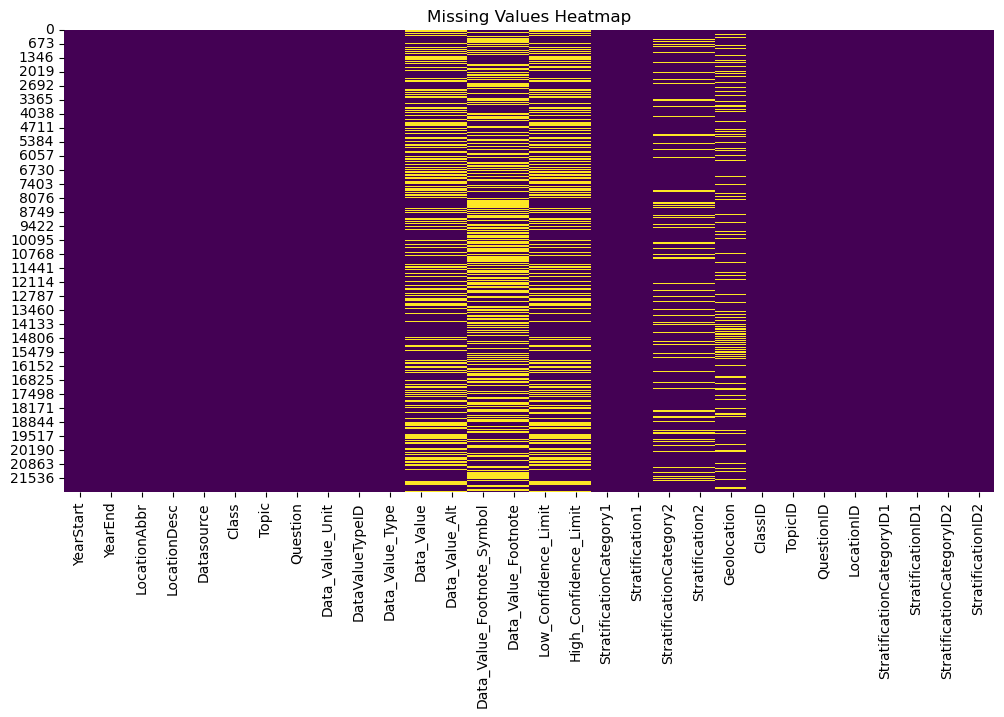

In [8]:
# visualize missing values using a heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()

## Cleaning Missing Values

In [9]:
# calculate missing value percentages
missing_values = df.isnull().sum() / len(df) * 100

# display columns with missing values only
missing_values[missing_values > 0].sort_values(ascending=False)

Data_Value_Footnote_Symbol    45.189794
Data_Value_Footnote           45.189794
Low_Confidence_Limit          36.709945
High_Confidence_Limit         36.709945
Data_Value                    36.272654
Data_Value_Alt                36.272654
Geolocation                   18.974844
StratificationCategory2       13.686773
Stratification2               13.686773
dtype: float64

In [10]:
# drop columns that are not useful
columns_to_drop = ["Data_Value_Footnote_Symbol", "Data_Value_Footnote",
                   "Geolocation"]
df_cleaned = df.drop(columns=columns_to_drop)

print("Dropped columns: {}".format(columns_to_drop))

Dropped columns: ['Data_Value_Footnote_Symbol', 'Data_Value_Footnote', 'Geolocation']


These columns are dropped because they contain notes and metadata that are not useful for analysis. `Geolocation` is dropped since maps are not being used.